In [ ]:
 #import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Полезные ссылки:

- Matplotlib: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
- Seaborn: https://seaborn.pydata.org/index.html

In [ ]:
#import csv file to pandas DataFrame
df = pd.read_csv('YPS.csv')

#creating a subset for obesity problem
df = df[['Age', 'Gender', 'Weight', 'Height', 'Village - town', 'Internet', 'Medicine', 'Countryside, outdoors', 'Dancing', 'Passive sport', 'Active sport', 'Adrenaline sports', 'Alcohol', 'Healthy eating']] #save only variables we are interested in
df = df.dropna() #remove nan

#calculate body mass index
df["BMI"] = df["Weight"]/((df["Height"]*0.01)**2)

#calculate binary obesity variable (if a person has obesity)
Obesity = []
for i in df['BMI']:
    if i >= 30:
        Obesity.append('Obesity')
    elif i >= 25:
        Obesity.append('Risk')
    else:
        Obesity.append('Normal')
df['Obesity_status'] = Obesity

## ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВЕННОЙ ПЕРЕМЕННОЙ

Визуализируем распределение индекса массы тела

<AxesSubplot:xlabel='BMI', ylabel='Count'>

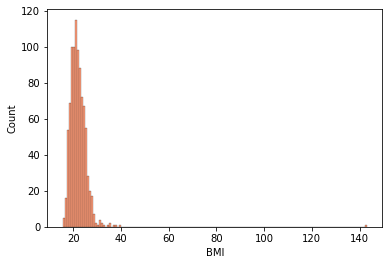

In [ ]:
#histplot
sns.histplot(df['BMI'], color = 'coral')

Визуализация помогает быстро идентифицировать подозрительные значения. BMI выше 140 невозможен. Это наблюдение следует удалить из выборки

<AxesSubplot:xlabel='BMI', ylabel='Count'>

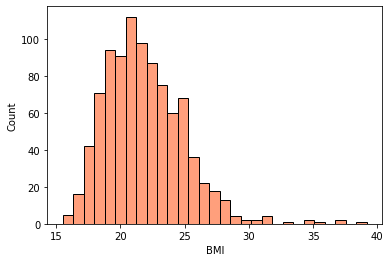

In [ ]:
#remove suspicious values
df = df[df['BMI'] < 50]
#new histplot
sns.histplot(df['BMI'], color = 'coral')

аналогичный результат можно получить с помощью displot

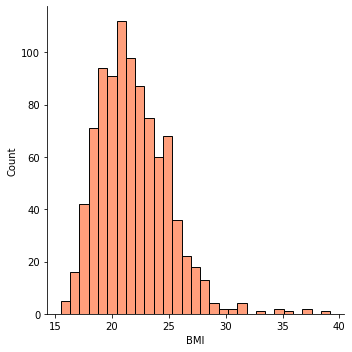

In [ ]:
sns.displot(df['BMI'], color = 'coral')

Другой вид того же графика

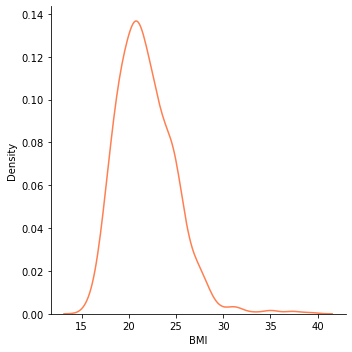

In [ ]:
sns.displot(df['BMI'], color = 'coral', kind="kde")

<AxesSubplot:xlabel='BMI', ylabel='Count'>

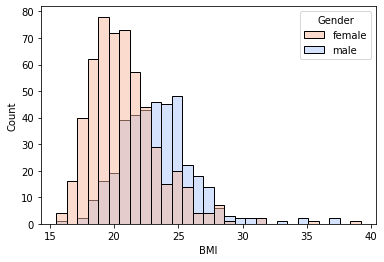

In [ ]:
sns.histplot(df, x = 'BMI', hue = 'Gender', palette = "coolwarm_r")

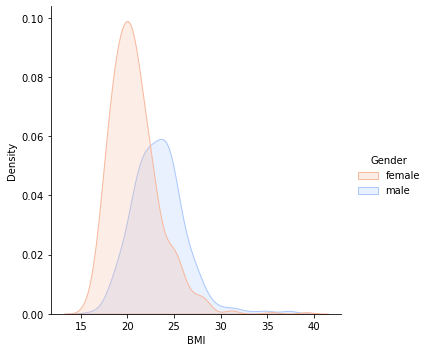

In [ ]:
sns.displot(df, x = 'BMI', hue = 'Gender', kind="kde", fill=True, palette = "coolwarm_r")

<AxesSubplot:ylabel='BMI'>

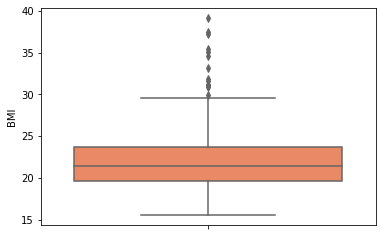

In [ ]:
#boxplot
sns.boxplot(data = df, y = 'BMI', color = 'coral')

### ПОКАЗАТЕЛИ РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВЕННОЙ ПЕРЕМЕННОЙ

In [ ]:
print('mean:')
print(df['BMI'].mean())
print('median:')
print(df['BMI'].median())
print('std:')
print(df['BMI'].std())
print('min:')
print(df['BMI'].min())
print('max:')
print(df['BMI'].max())
print('75%:')
print(np.quantile(df['BMI'], 0.75))
print('25%:')
print(np.quantile(df['BMI'], 0.25))

mean:
21.847859002292356
median:
21.45357371372652
std:
3.0732834909436093
min:
15.495867768595042
max:
39.183673469387756
75%:
23.695431440119915
25%:
19.591836734693878


In [ ]:
#Check if distribution is normal
stats.normaltest(df['BMI'])

NormaltestResult(statistic=196.52535423602632, pvalue=2.113788596370826e-43)

### ЗАДАНИЕ 1

Покажите на графике, как распределяется переменная "Height" для мужчин и женщин. Посчитайте среднее, медиану, стандартное отклонение, минимум и максимум для этой переменной. Проверьте нормальность распределения

In [ ]:
#Your code here

## РАСПРЕДЕЛЕНИЕ НОМИНАЛЬНОЙ ПЕРЕМЕННОЙ

Визуализируем распределение по полу

**Вариант 1: Круговая диаграмма (Pie chart)**

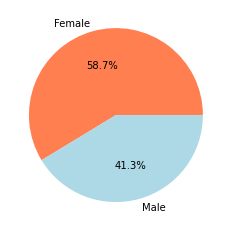

In [ ]:
Female = sum(df['Gender'] == 'female')
Male = sum(df['Gender'] == 'male')
data = [Female, Male]
labels = ['Female', 'Male']

colors = ['coral', 'lightblue']
plt.pie(data, labels = labels, colors = colors, autopct='%1.1f%%')
plt.show()

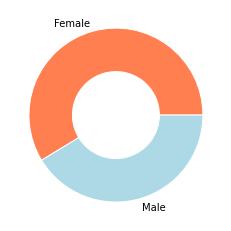

In [ ]:
plt.pie(data, labels = labels, colors = colors, wedgeprops=dict(width=0.5, edgecolor='w'))
plt.show()

**Вариант 2: Столбчатая диаграмма (Bar chart)**

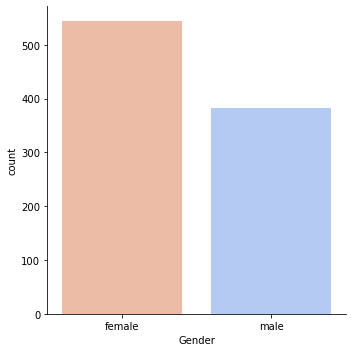

In [ ]:
sns.catplot(data=df, x="Gender", kind="count", palette = "coolwarm_r")

### ЗАДАНИЕ 2
Покажите на графике распределение переменной "Village - Town"

In [ ]:
#Your code here

## РАСПРЕДЕЛЕНИЕ КАТЕГОРИАЛЬНОЙ ПЕРЕМЕННОЙ

<AxesSubplot:xlabel='Healthy eating', ylabel='Count'>

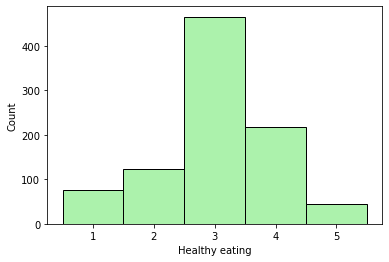

In [ ]:
sns.histplot(df, x = 'Healthy eating', discrete = 'True', color = 'lightgreen')

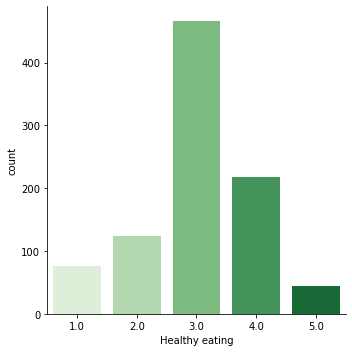

In [ ]:
sns.catplot(data=df, x="Healthy eating", kind="count", palette = "Greens")

## СОВМЕСТНОЕ РАСПРЕДЕЛЕНИЕ 2-х КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ
Посмотрим совместное распределение роста и веса

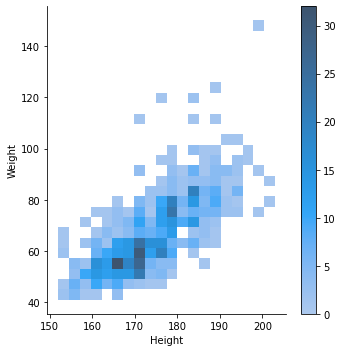

In [ ]:
sns.displot(df, x="Height", y="Weight", cbar=True)

И в разбивке по полу

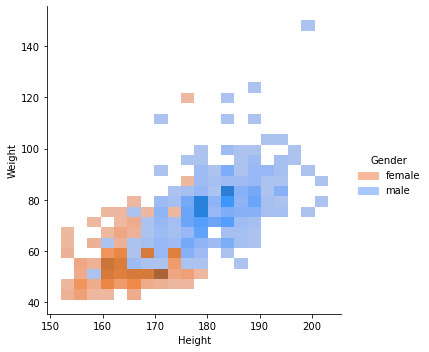

In [ ]:
sns.displot(df, x="Height", y="Weight", hue = "Gender", palette = "coolwarm_r")

Почти то же самое

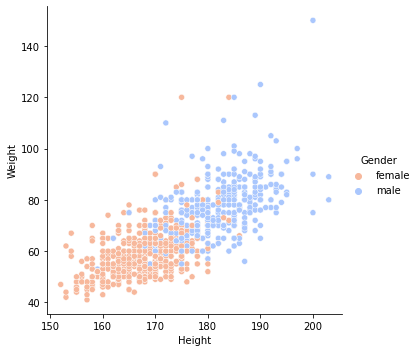

In [ ]:
sns.relplot(data=df, x="Height", y="Weight", hue="Gender", palette = "coolwarm_r")

Объединенный график

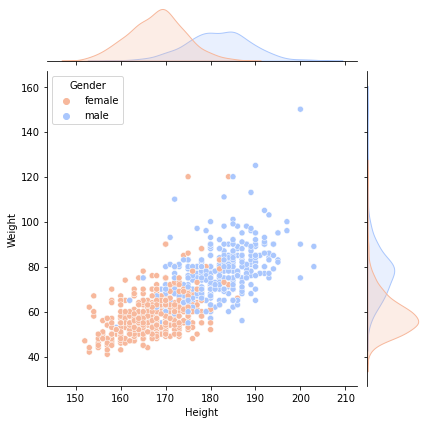

In [ ]:
sns.jointplot(
    data=df,
    x="Height", y="Weight", hue="Gender", palette = "coolwarm_r",
)

График, на котором есть распределение и по полу, и по obesity. В большинстве случаев не рекомендуется (график выглядит перегружено, информация об obesity визуально плохо воспринимается)

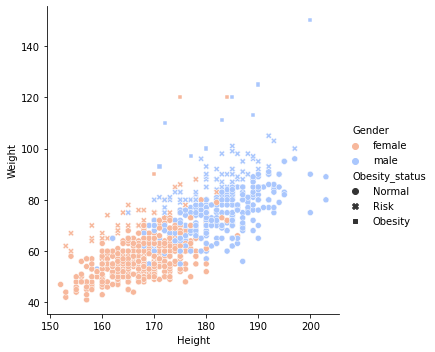

In [ ]:
sns.relplot(data=df, x="Height", y="Weight", hue="Gender", style = 'Obesity_status', palette = "coolwarm_r")

In [ ]:
import scipy
scipy.stats.pearsonr(df['Height'], df['Weight'])

(0.6995872500661454, 2.545737712684697e-137)

## СОВМЕСТНОЕ РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВЕННОЙ И НОМИНАЛЬНОЙ ПЕРЕМЕННЫХ

Отчасти было затронуто выше

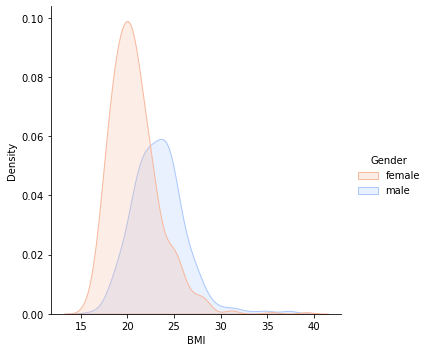

In [ ]:
sns.displot(df, x = 'BMI', hue = 'Gender', kind="kde", fill=True, palette = "coolwarm_r")

<AxesSubplot:xlabel='Gender', ylabel='BMI'>

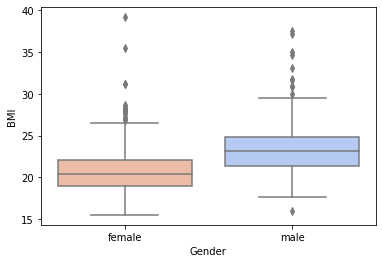

In [ ]:
sns.boxplot(data = df, y = 'BMI', x = 'Gender', palette = 'coolwarm_r')

In [ ]:
female = df[df['Gender'] == 'female']
male = df[df['Gender'] == 'male']
stats.ttest_ind(female['BMI'], male['BMI'])

Ttest_indResult(statistic=-13.718813751326996, pvalue=3.9979917666399665e-39)

In [ ]:
female['BMI'].mean()

20.78812466517935

<AxesSubplot:xlabel='Gender', ylabel='BMI'>

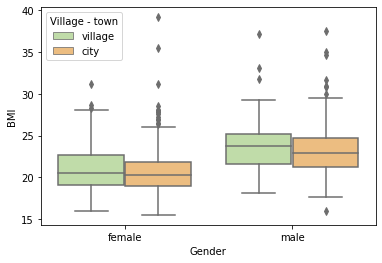

In [ ]:
sns.boxplot(data = df, y = 'BMI', x = 'Gender', hue = 'Village - town', palette = 'Spectral_r')

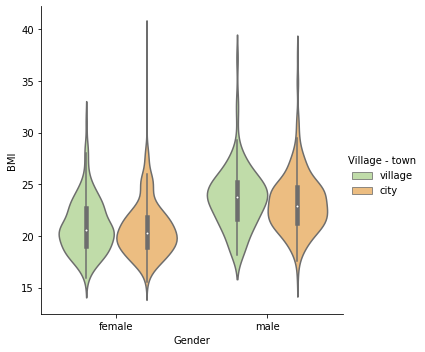

In [ ]:
sns.catplot(data=df, x="Gender", y="BMI", hue="Village - town", kind="violin", palette = 'Spectral_r')

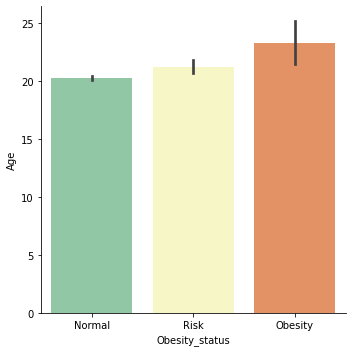

In [ ]:
sns.catplot(data=df, x="Obesity_status", y="Age", kind="bar", palette = 'Spectral_r')

### ЗАДАНИЕ 3
Покажите совместное распределение BMI и Alcohol. Проверьте, есть ли разница по BMI у людей с разным статусом по переменной Alcohol

In [ ]:
#Your code here

## СОВМЕСТНОЕ РАСПРЕДЕЛЕНИЕ НОМИНАЛЬНЫХ/КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ

Давайте покажем, как отличается привычка правильно питаться у мужчин и у женщин. Нарисуем столбчатую диаграмму с накоплением

Original code here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py

In [ ]:
#Подготовим нужные переменные

Female_1 = (sum((df['Healthy eating'] == 1.0) & (df['Gender'] == 'female')) / len(df[df['Gender'] == 'female']))*100
Male_1 = (sum((df['Healthy eating'] == 1.0) & (df['Gender'] == 'male')) / len(df[df['Gender'] == 'male']))*100

Female_2 = (sum((df['Healthy eating'] == 2.0) & (df['Gender'] == 'female')) / len(df[df['Gender'] == 'female']))*100
Male_2 = (sum((df['Healthy eating'] == 2.0) & (df['Gender'] == 'male')) / len(df[df['Gender'] == 'male']))*100

Female_3 = (sum((df['Healthy eating'] == 3.0) & (df['Gender'] == 'female')) / len(df[df['Gender'] == 'female']))*100
Male_3 = (sum((df['Healthy eating'] == 3.0) & (df['Gender'] == 'male')) / len(df[df['Gender'] == 'male']))*100

Female_4 = (sum((df['Healthy eating'] == 4.0) & (df['Gender'] == 'female')) / len(df[df['Gender'] == 'female']))*100
Male_4 = (sum((df['Healthy eating'] == 4.0) & (df['Gender'] == 'male')) / len(df[df['Gender'] == 'male']))*100

Female_5 = (sum((df['Healthy eating'] == 5.0) & (df['Gender'] == 'female')) / len(df[df['Gender'] == 'female']))*100
Male_5 = (sum((df['Healthy eating'] == 5.0) & (df['Gender'] == 'male')) / len(df[df['Gender'] == 'male']))*100

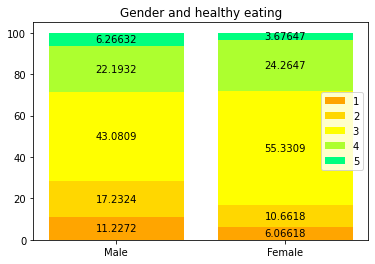

In [ ]:
gender = ('Male', 'Female')

healthy_eating_counts = {
    '1': np.array([Male_1, Female_1]),
    '2': np.array([Male_2, Female_2]),
    '3': np.array([Male_3, Female_3]),
    '4': np.array([Male_4, Female_4]),
    '5': np.array([Male_5, Female_5])
}
width = 0.8 # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)
colors = ['orange', 'gold', 'yellow', 'greenyellow', 'springgreen']
i = 0
for status, count in healthy_eating_counts.items():
    p = ax.bar(gender, count,  width, label= status, bottom=bottom, color = colors[i])
    bottom += count
    i+=1

    ax.bar_label(p, label_type='center')

ax.set_title('Gender and healthy eating')
ax.legend()

plt.show()

### ЗАДАНИЕ 4

Создайте переменную на основе healthy eating, которая принимает 3 значения: "unhealthy" если 1 или 2, "normal" если 3, "healthy" если 5. Постройте для этой переменной график, аналогичный графику выше. Постройте таблицу сопряженности для вашей новой переменной и пола

In [ ]:
#your code here

### ЗАДАНИЕ 5

Нарисуйте сложный график по образцу

- В центре Pie-чарт: распределение выборки по полу
- По бокам Два bar chart: для каждого пола распределение по obesity status

![piechart.jpg](attachment:piechart.jpg)

Похожий график вот здесь

https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py

In [ ]:
# your code here

In [ ]:
#Let's find the observable frequences for the continguency table
obesity_boys = len(df[(df['Obesity_status'] == 'Obesity') & (df['Gender'] == 'male')])
obesity_girls = len(df[(df['Obesity_status'] == 'Obesity') & (df['Gender'] == 'female')])
normal_boys = len(df[(df['Obesity_status'] == 'Normal') & (df['Gender'] == 'male')])
normal_girls = len(df[(df['Obesity_status'] == 'Normal') & (df['Gender'] == 'female')])

In [ ]:
table = np.array([[obesity_boys, obesity_girls], [normal_boys, normal_girls]]) #create continguency table
stats.chi2_contingency(table) #use chi-square criterion

(3.24625388623297,
 0.0715868956579027,
 1,
 array([[  5.26289926,   8.73710074],
        [300.73710074, 499.26289926]]))

### ЗАДАНИЕ 6*

https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

Нарисуйте такой график для переменных 'Dancing', 'Passive sport', 'Active sport', 'Adrenaline sports'

In [ ]:
#your code here

## ОТВЕТЫ

Дисклеймер: это только один из вариантов, как решить задание. Вы можете решить его по-другому (выбрать другой тип графика и пр.)

### ЗАДАНИЕ 1

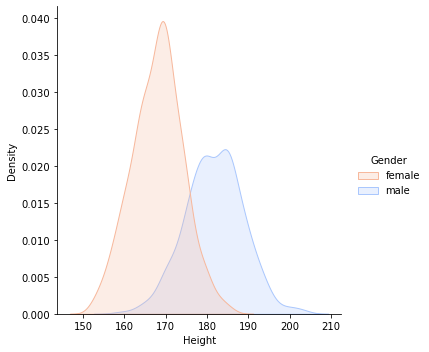

In [ ]:
sns.displot(df, x = 'Height', hue = 'Gender', kind="kde", fill=True, palette = "coolwarm_r")

In [ ]:
print('mean:')
print(df['Height'].mean())
print('median:')
print(df['Height'].median())
print('std:')
print(df['Height'].std())
print('min:')
print(df['Height'].min())
print('max:')
print(df['Height'].max())

mean:
173.67313915857605
median:
173.0
std:
9.382671010806506
min:
152.0
max:
203.0


In [ ]:
#Check if distribution is normal
stats.normaltest(df['Height'])

NormaltestResult(statistic=21.784573932572524, pvalue=1.860115343959732e-05)

### ЗАДАНИЕ 2

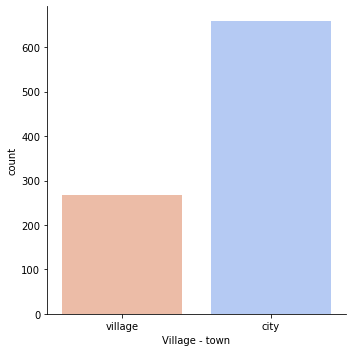

In [ ]:
sns.catplot(data=df, x="Village - town", kind="count", palette = "coolwarm_r")

### ЗАДАНИЕ 3

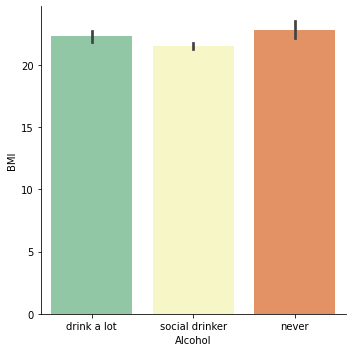

In [ ]:
sns.catplot(data=df, x="Alcohol", y="BMI", kind="bar", palette = 'Spectral_r')

In [ ]:
drink = df[df['Alcohol'] == 'drink a lot']
social = df[df['Alcohol'] == 'social drinker']
never = df[df['Alcohol'] == 'never']

In [ ]:
stats.ttest_ind(drink['BMI'], social['BMI'])

Ttest_indResult(statistic=3.3253345081063457, pvalue=0.0009226076415849385)

In [ ]:
stats.ttest_ind(drink['BMI'], never['BMI'])

Ttest_indResult(statistic=-1.3066834074488347, pvalue=0.19225854994786135)

In [ ]:
stats.ttest_ind(social['BMI'], never['BMI'])

Ttest_indResult(statistic=-4.047919027445732, pvalue=5.7330038542636817e-05)

### ЗАДАНИЕ 4

In [ ]:
New = []
for i in df['Healthy eating']:
    if i <= 2:
        New.append('Unhealthy')
    elif i == 3:
        New.append('Normal')
    else:
        New.append('Healthy')
df['Healthy_eating_cat'] = New

In [ ]:
Female_1 = (sum((df['Healthy_eating_cat'] == 'Unhealthy') & (df['Gender'] == 'female')) / len(df[df['Gender'] == 'female']))*100
Male_1 = (sum((df['Healthy_eating_cat'] == 'Unhealthy') & (df['Gender'] == 'male')) / len(df[df['Gender'] == 'male']))*100

Female_2 = (sum((df['Healthy_eating_cat'] == 'Normal') & (df['Gender'] == 'female')) / len(df[df['Gender'] == 'female']))*100
Male_2 = (sum((df['Healthy_eating_cat'] == 'Normal') & (df['Gender'] == 'male')) / len(df[df['Gender'] == 'male']))*100

Female_3 = (sum((df['Healthy_eating_cat'] == 'Healthy') & (df['Gender'] == 'female')) / len(df[df['Gender'] == 'female']))*100
Male_3 = (sum((df['Healthy_eating_cat'] == 'Healthy') & (df['Gender'] == 'male')) / len(df[df['Gender'] == 'male']))*100

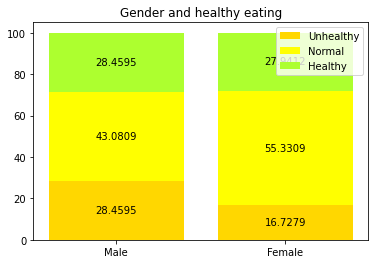

In [ ]:
gender = ('Male', 'Female')

healthy_eating_counts = {
    'Unhealthy': np.array([Male_1, Female_1]),
    'Normal': np.array([Male_2, Female_2]),
    'Healthy': np.array([Male_3, Female_3])
}
width = 0.8 # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)
colors = ['gold', 'yellow', 'greenyellow']
i = 0
for status, count in healthy_eating_counts.items():
    p = ax.bar(gender, count,  width, label= status, bottom=bottom, color = colors[i])
    bottom += count
    i+=1

    ax.bar_label(p, label_type='center')

ax.set_title('Gender and healthy eating')
ax.legend()

plt.show()

### ЗАДАНИЕ 5

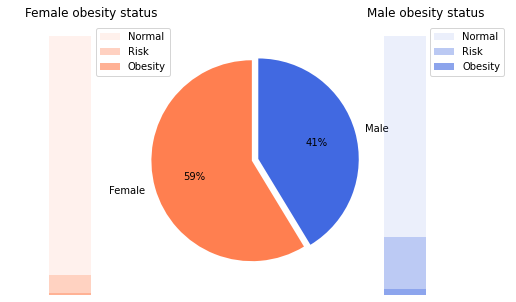

In [ ]:
plt.rcParams.update({'font.size': 10})

Female_obese = sum((df['Gender'] == 'female') & (df['Obesity_status'] == 'Obesity'))
Female_risk = sum((df['Gender'] == 'female') & (df['Obesity_status'] == 'Risk'))
Female_normal = sum((df['Gender'] == 'female') & (df['Obesity_status'] == 'Normal'))

Male_obese = sum((df['Gender'] == 'male') & (df['Obesity_status'] == 'Obesity'))
Male_risk = sum((df['Gender'] == 'male') & (df['Obesity_status'] == 'Risk'))
Male_normal = sum((df['Gender'] == 'male') & (df['Obesity_status'] == 'Normal'))

colors = ['coral', 'royalblue']

# make figure and assign axis objects
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [Female, Male]
labels = ['Female', 'Male']
explode = [0.1, 0.0]
# rotate so that first wedge is split by the x-axis
angle = -90 * overall_ratios[1]
wedges, *_ = ax2.pie(overall_ratios, autopct='%1.0f%%', startangle=angle,
                     labels=labels, explode = explode,  colors = colors, radius = 1.5)

# bar chart male parameters
group_ratios = [Male_obese, Male_risk, Male_normal]
group_labels = ['Obesity', 'Risk', 'Normal']
bottom = 1
width = 1

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(group_ratios, group_labels)])):
    bottom -= height
    bc = ax3.bar(0, height, width, bottom=bottom, color='royalblue', label=label,
                 alpha=0.1 + 0.25 * j)
    #ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax3.set_title('Male obesity status')
ax3.legend()
ax3.axis('off')
ax3.set_xlim(- 1.5 * width, 2.5 * width)


# bar chart female parameters
group1_ratios = [Female_obese, Female_risk, Female_normal]
group1_labels = ['Obesity', 'Risk', 'Normal']
bottom = 1
width = 1

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(group1_ratios, group1_labels)])):
    bottom -= height
    bc = ax1.bar(0, height, width, bottom=bottom, color='coral', label=label,
                 alpha=0.1 + 0.25 * j)
    #ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax1.set_title('Female obesity status')
ax1.legend()
ax1.axis('off')
ax1.set_xlim(- 1.5 * width, 2.5 * width)
plt.show()